In [1]:
from pycaret.regression import *

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
ver1 = pd.read_csv('0918_eda_one_hot.csv').drop(['STRG_DT'], axis=1)
ver1_cont = ver1.drop(['cluster_1', 'cluster_2', 'cluster_3'], axis=1)
ver1_cat = ver1[['cluster_1', 'cluster_2', 'cluster_3']]

y_val = np.array(ver1_cont.iloc[:, 0]).reshape(-1, 1)
x_val = ver1_cont.drop(['FRST_TREE_CNT'], axis=1)

In [4]:
from sklearn.model_selection import train_test_split

x_train_val, x_test_val = train_test_split(x_val, test_size= 0.2, shuffle = False)
y_train_val, y_test_val = train_test_split(y_val, test_size= 0.2, shuffle = False)

train_cat, test_cat = train_test_split(ver1_cat, test_size= 0.2, shuffle = False)
test_cat = test_cat.reset_index().drop(['index'], axis=1)

In [5]:
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train_val)
y_test_scaled = y_scaler.transform(y_test_val)

x_scaler = StandardScaler()
x_train_scaled = x_scaler.fit_transform(x_train_val)
x_test_scaled = x_scaler.transform(x_test_val)

In [6]:
y_train_df = pd.DataFrame(y_train_scaled, columns = ['FRST_TREE_CNT'])
x_train_df = pd.DataFrame(x_train_scaled, columns = x_val.columns)

y_test_df = pd.DataFrame(y_test_scaled, columns = ['FRST_TREE_CNT'])
x_test_df = pd.DataFrame(x_test_scaled, columns = x_val.columns)

In [7]:
train_df = pd.concat([y_train_df, x_train_df, train_cat], axis=1)
test_df = pd.concat([y_test_df, x_test_df, test_cat], axis=1)

In [8]:
df1 = pd.concat([train_df, test_df]).reset_index().drop(['index'], axis=1)

In [9]:
model1 = setup(df1, target = 'FRST_TREE_CNT', train_size = 0.8, data_split_shuffle = False, fold_strategy='timeseries')

,Description,Value
0,Session id,8220
1,Target,FRST_TREE_CNT
2,Target type,Regression
3,Original data shape,"(26064, 11)"
4,Transformed data shape,"(26064, 11)"
5,Transformed train set shape,"(20851, 11)"
6,Transformed test set shape,"(5213, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [10]:
Gradient_Boosting_EDA_TS = load_model('Gradient_Boosting_EDA_TS', platform = None, authentication = None, verbose=True)

Transformation Pipeline and Model Successfully Loaded


In [19]:
predict_model(Gradient_Boosting_EDA_TS)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0415,0.0029,0.0536,0.8789,0.0163,0.0182


,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,cluster_3,FRST_TREE_CNT,prediction_label
20851,-0.665490,0.964621,-1.859606,0.082599,-2.144250,0.232825,0.122240,0,0,1,-2.201073,-2.174110
20852,-0.676589,0.924656,-1.859606,0.067236,-2.123275,0.232825,0.122240,0,0,1,-2.201073,-2.169392
20853,-0.709887,0.871370,-1.859606,0.021144,-2.039375,0.278108,0.122240,0,0,1,-2.201073,-2.196422
20854,-0.665490,0.844727,-1.859606,0.021144,-1.976451,0.232825,0.122240,0,0,1,-2.201073,-2.177298
20855,-0.687689,0.818083,-1.859606,0.005780,-1.899542,0.232825,0.122240,0,0,1,-2.201073,-2.174998
...,...,...,...,...,...,...,...,...,...,...,...,...
26059,-0.432407,0.191968,-1.859606,-0.255404,0.128035,1.138482,-1.115531,0,0,1,-2.324533,-2.285530
26060,-0.432407,0.191968,-1.859606,-0.255404,0.156001,1.138482,-1.115531,0,0,1,-2.324533,-2.288230
26061,-0.410208,0.205289,-1.859606,-0.255404,0.176976,1.138482,-1.115531,0,0,1,-2.324533,-2.298243
26062,-0.365811,0.191968,-1.859606,-0.255404,0.204943,1.138482,-1.115531,0,0,1,-2.324533,-2.299307


In [45]:
y_train = get_config('y_train')
y_test = get_config('y_test')

In [28]:
train_pred = predict_model(Gradient_Boosting_EDA_TS, data = train_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0995,0.0213,0.1461,0.9787,0.0801,0.4069


In [30]:
test_pred = predict_model(Gradient_Boosting_EDA_TS)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0415,0.0029,0.0536,0.8789,0.0163,0.0182


In [32]:
p_train = train_pred['prediction_label']
p_test = test_pred['prediction_label']

In [49]:
train = pd.DataFrame([p_train, y_train]).T

In [46]:
test = pd.DataFrame([p_test, y_test]).T

In [50]:
total = pd.concat([train, test])

In [51]:
total

,prediction_label,FRST_TREE_CNT
0,0.032860,-0.102251
1,-0.084028,-0.102251
2,-0.082385,-0.102251
3,-0.099969,-0.102251
4,-0.044110,-0.102251
...,...,...
26059,-2.285530,-2.324533
26060,-2.288230,-2.324533
26061,-2.298243,-2.324533
26062,-2.299307,-2.324533


In [64]:
date_df = pd.read_csv('0918_eda_one_hot.csv')

In [67]:
total['STRG_DT'] = date_df['STRG_DT']

In [69]:
total['STRG_DT'] = pd.to_datetime(total['STRG_DT'])
total.set_index('STRG_DT', inplace=True)

In [70]:
daily_mean = total.groupby(total.index.date).mean()

In [71]:
daily_mean

,prediction_label,FRST_TREE_CNT
2022-01-01,-0.093566,-0.102251
2022-01-02,-0.049406,-0.102251
2022-01-03,-0.071014,-0.102251
2022-01-04,-0.114666,-0.102251
2022-01-05,-0.061090,-0.102251
...,...,...
2022-06-26,-2.280755,-2.324533
2022-06-27,-2.302286,-2.324533
2022-06-28,-2.296145,-2.324533
2022-06-29,-2.324846,-2.324533


In [74]:
scale_pred = np.array(daily_mean.iloc[:, 0]).reshape(-1, 1)

In [83]:
scale_true = np.array(daily_mean.iloc[:, 1]).reshape(-1, 1)

In [86]:
pred = y_scaler.inverse_transform(scale_pred)
true = y_scaler.inverse_transform(scale_true)

In [93]:
df = pd.concat([pd.DataFrame(pred), pd.DataFrame(true)], axis = 1)

In [94]:
df.columns = ['pred', 'true']

In [114]:
train_rs = df.loc[:144]

In [110]:
test_rs = df.loc[144: ]

In [117]:
train_rs['error'] = train_rs['true'] - train_rs['pred']
test_rs['error'] = test_rs['true'] - test_rs['pred']

In [120]:
from sklearn.metrics import mean_squared_error, r2_score

train_rmse = np.sqrt(mean_squared_error(train_rs['true'], train_rs['pred']))
train_r2 = r2_score(train_rs['true'], train_rs['pred'])
train_score = [train_rmse, train_r2]

In [121]:
train_score

[0.2158564679762883, 0.9886969794896554]

In [122]:
test_rmse = np.sqrt(mean_squared_error(test_rs['true'], test_rs['pred']))
test_r2 = r2_score(test_rs['true'], test_rs['pred'])
test_score = [test_rmse, test_r2]

In [124]:
test_score

[0.08425723000038587, 0.9259687122447863]

<AxesSubplot:>

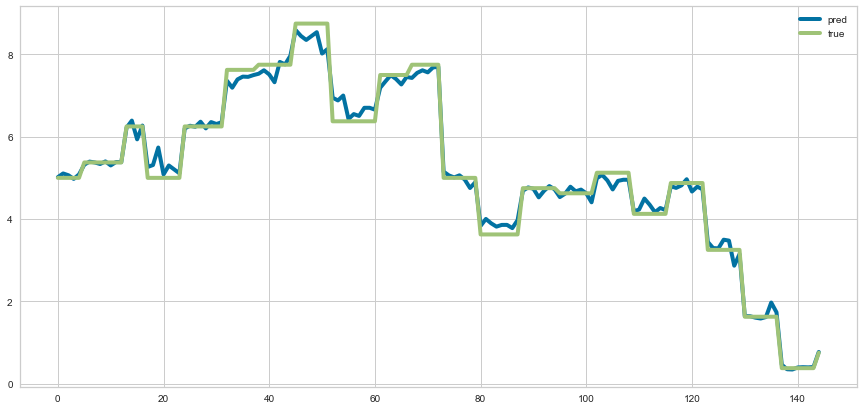

In [140]:
import matplotlib.pyplot as plt

train_gp = train_rs[['pred', 'true']]
train_gp.plot(figsize = (15, 7), linewidth = 4)

<AxesSubplot:>

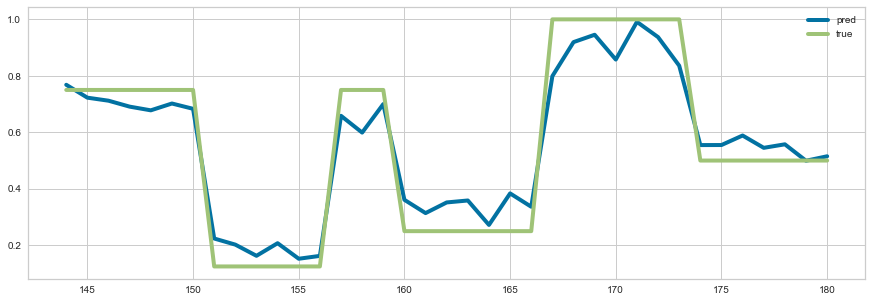

In [139]:
test_gp = test_rs[['pred', 'true']]
test_gp.plot(figsize = (15, 5), linewidth = 4)